In [3]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt

In [23]:
csv_file=r"C:\Users\vipra\Downloads\imu.log.txt"

In [25]:
my_data=pd.read_csv(csv_file)
my_data

,Packet number,Gyroscope X (deg/s),Gyroscope Y (deg/s),Gyroscope Z (deg/s),Accelerometer X (g),Accelerometer Y (g),Accelerometer Z (g),Magnetometer X (G),Magnetometer Y (G),Magnetometer Z (G)
0,200001,4.0625,10.0625,0.4375,-0.111328,0.063965,0.978027,0.008789,0.065430,-0.254883
1,200002,5.9375,9.6250,1.4375,-0.115234,0.071777,0.974121,0.008789,0.065430,-0.254883
2,200004,7.8125,8.7500,2.6250,-0.119141,0.083496,0.981934,0.011230,0.062500,-0.257324
3,200005,9.2500,7.7500,3.0000,-0.119141,0.091309,0.978027,0.011230,0.062500,-0.254883
4,200007,10.0625,7.1250,3.6250,-0.111328,0.103027,0.970703,0.011230,0.062500,-0.254883
...,...,...,...,...,...,...,...,...,...,...
652,200994,53.4375,-321.7500,34.0625,-1.442871,0.777832,3.275879,-0.111328,0.085449,-0.224609
653,200995,37.3125,-310.9375,30.7500,-1.668945,0.844238,3.399414,-0.117676,0.083984,-0.221680
654,200997,20.6250,-304.8750,26.8125,-1.980469,0.910156,3.395508,-0.126953,0.082520,-0.216309
655,200998,4.8750,-300.8750,20.9375,-2.256836,0.933106,3.349121,-0.126953,0.082520,-0.216309


In [27]:
print(my_data.head())

   Packet number  Gyroscope X (deg/s)  Gyroscope Y (deg/s)  \
0         200001               4.0625              10.0625   
1         200002               5.9375               9.6250   
2         200004               7.8125               8.7500   
3         200005               9.2500               7.7500   
4         200007              10.0625               7.1250   

   Gyroscope Z (deg/s)  Accelerometer X (g)  Accelerometer Y (g)  \
0               0.4375            -0.111328             0.063965   
1               1.4375            -0.115234             0.071777   
2               2.6250            -0.119141             0.083496   
3               3.0000            -0.119141             0.091309   
4               3.6250            -0.111328             0.103027   

   Accelerometer Z (g)  Magnetometer X (G)  Magnetometer Y (G)  \
0             0.978027            0.008789             0.06543   
1             0.974121            0.008789             0.06543   
2             0.9819

In [31]:
accX = my_data['Accelerometer X (g)'].to_numpy()
accY = my_data['Accelerometer Y (g)'].to_numpy()
accZ = my_data['Accelerometer Z (g)'].to_numpy()

In [33]:
gyroX = my_data['Gyroscope X (deg/s)'].to_numpy()
gyroY = my_data['Gyroscope Y (deg/s)'].to_numpy()
gyroZ = my_data['Gyroscope Z (deg/s)'].to_numpy()

In [34]:
print("Accelerometer X:", accX[:5])
print("Accelerometer Y:", accY[:5])
print("Accelerometer Z:", accZ[:5])

Accelerometer X: [-0.1113281 -0.1152344 -0.1191406 -0.1191406 -0.1113281]
Accelerometer Y: [0.06396484 0.07177734 0.08349609 0.09130859 0.1030273 ]
Accelerometer Z: [0.9780273 0.9741211 0.9819336 0.9780273 0.9707031]


In [35]:
print("Gyroscope X:", gyroX[:5])
print("Gyroscope Y:", gyroY[:5])
print("Gyroscope Z:", gyroZ[:5])

Gyroscope X: [ 4.0625  5.9375  7.8125  9.25   10.0625]
Gyroscope Y: [10.0625  9.625   8.75    7.75    7.125 ]
Gyroscope Z: [0.4375 1.4375 2.625  3.     3.625 ]


In [37]:
gyroX = np.radians(my_data['Gyroscope X (deg/s)'].to_numpy())
gyroY = np.radians(my_data['Gyroscope Y (deg/s)'].to_numpy())
gyroZ = np.radians(my_data['Gyroscope Z (deg/s)'].to_numpy())

In [38]:
print("Accelerometer X:", accX[:5])
print("Accelerometer Y:", accY[:5])
print("Accelerometer Z:", accZ[:5])


Accelerometer X: [-0.1113281 -0.1152344 -0.1191406 -0.1191406 -0.1113281]
Accelerometer Y: [0.06396484 0.07177734 0.08349609 0.09130859 0.1030273 ]
Accelerometer Z: [0.9780273 0.9741211 0.9819336 0.9780273 0.9707031]


In [39]:
print("Gyroscope X (rad/s):", gyroX[:5])
print("Gyroscope Y (rad/s):", gyroY[:5])
print("Gyroscope Z (rad/s):", gyroZ[:5])

Gyroscope X (rad/s): [0.070904   0.10362892 0.13635385 0.16144296 0.17562376]
Gyroscope Y (rad/s): [0.17562376 0.16798794 0.15271631 0.13526302 0.12435471]
Gyroscope Z (rad/s): [0.00763582 0.02508911 0.04581489 0.05235988 0.06326819]


In [41]:
accX = my_data['Accelerometer X (g)'].to_numpy() * 9.81  # 1 g = 9.81 m/s^2
accY = my_data['Accelerometer Y (g)'].to_numpy() * 9.81
accZ = my_data['Accelerometer Z (g)'].to_numpy() * 9.81

In [42]:
print("Accelerometer X (m/s^2):", accX[:5])
print("Accelerometer Y (m/s^2):", accY[:5])
print("Accelerometer Z (m/s^2):", accZ[:5])

print("Gyroscope X (rad/s):", gyroX[:5])
print("Gyroscope Y (rad/s):", gyroY[:5])
print("Gyroscope Z (rad/s):", gyroZ[:5])

Accelerometer X (m/s^2): [-1.09212866 -1.13044946 -1.16876929 -1.16876929 -1.09212866]
Accelerometer Y (m/s^2): [0.62749508 0.70413571 0.81909664 0.89573727 1.01069781]
Accelerometer Z (m/s^2): [9.59444781 9.55612799 9.63276862 9.59444781 9.52259741]
Gyroscope X (rad/s): [0.070904   0.10362892 0.13635385 0.16144296 0.17562376]
Gyroscope Y (rad/s): [0.17562376 0.16798794 0.15271631 0.13526302 0.12435471]
Gyroscope Z (rad/s): [0.00763582 0.02508911 0.04581489 0.05235988 0.06326819]


In [43]:
acc_magnitude = np.sqrt(accX**2 + accY**2 + accZ**2)

In [44]:
print("Accelerometer X (m/s^2):", accX[:5])
print("Accelerometer Y (m/s^2):", accY[:5])
print("Accelerometer Z (m/s^2):", accZ[:5])
print("Accelerometer Magnitude (m/s^2):", acc_magnitude[:5])

print("Gyroscope X (rad/s):", gyroX[:5])
print("Gyroscope Y (rad/s):", gyroY[:5])
print("Gyroscope Z (rad/s):", gyroZ[:5])

Accelerometer X (m/s^2): [-1.09212866 -1.13044946 -1.16876929 -1.16876929 -1.09212866]
Accelerometer Y (m/s^2): [0.62749508 0.70413571 0.81909664 0.89573727 1.01069781]
Accelerometer Z (m/s^2): [9.59444781 9.55612799 9.63276862 9.59444781 9.52259741]
Accelerometer Magnitude (m/s^2): [9.67677239 9.6484872  9.73792443 9.70679122 9.6381594 ]
Gyroscope X (rad/s): [0.070904   0.10362892 0.13635385 0.16144296 0.17562376]
Gyroscope Y (rad/s): [0.17562376 0.16798794 0.15271631 0.13526302 0.12435471]
Gyroscope Z (rad/s): [0.00763582 0.02508911 0.04581489 0.05235988 0.06326819]


In [46]:
#6
# Create timestamps starting from 10:00:00
num_samples = len(my_data)
start_time = pd.to_datetime('10:00:00')
time_interval = pd.to_timedelta(1 / 100, unit='s')  # Assuming a frequency of 100Hz

timestamps = pd.date_range(start=start_time, periods=num_samples, freq=time_interval)


In [47]:
print("Timestamps:", timestamps[:5])
print("Accelerometer X (m/s^2):", accX[:5])
print("Accelerometer Y (m/s^2):", accY[:5])
print("Accelerometer Z (m/s^2):", accZ[:5])
print("Accelerometer Magnitude (m/s^2):", acc_magnitude[:5])

print("Gyroscope X (rad/s):", gyroX[:5])
print("Gyroscope Y (rad/s):", gyroY[:5])
print("Gyroscope Z (rad/s):", gyroZ[:5])

Timestamps: DatetimeIndex([       '2024-02-16 10:00:00', '2024-02-16 10:00:00.010000',
               '2024-02-16 10:00:00.020000', '2024-02-16 10:00:00.030000',
               '2024-02-16 10:00:00.040000'],
              dtype='datetime64[ns]', freq='10L')
Accelerometer X (m/s^2): [-1.09212866 -1.13044946 -1.16876929 -1.16876929 -1.09212866]
Accelerometer Y (m/s^2): [0.62749508 0.70413571 0.81909664 0.89573727 1.01069781]
Accelerometer Z (m/s^2): [9.59444781 9.55612799 9.63276862 9.59444781 9.52259741]
Accelerometer Magnitude (m/s^2): [9.67677239 9.6484872  9.73792443 9.70679122 9.6381594 ]
Gyroscope X (rad/s): [0.070904   0.10362892 0.13635385 0.16144296 0.17562376]
Gyroscope Y (rad/s): [0.17562376 0.16798794 0.15271631 0.13526302 0.12435471]
Gyroscope Z (rad/s): [0.00763582 0.02508911 0.04581489 0.05235988 0.06326819]


In [48]:
#7
# Smooth the accelerometer magnitude using a moving average filter with a window size of 10
window_size = 10
acc_smooth = np.convolve(acc_magnitude, np.ones(window_size)/window_size, mode='valid')

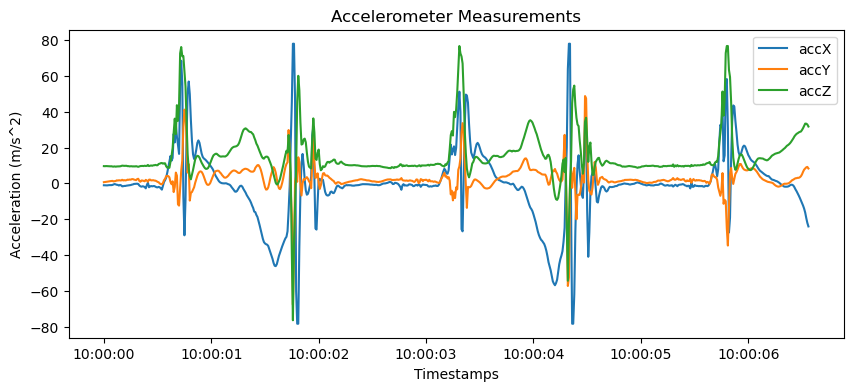

In [49]:
#8.a
# Plot accelerometer measurements
plt.figure(figsize=(10, 4))
plt.plot(timestamps, accX, label='accX')
plt.plot(timestamps, accY, label='accY')
plt.plot(timestamps, accZ, label='accZ')
plt.xlabel('Timestamps')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.title('Accelerometer Measurements')
plt.show()


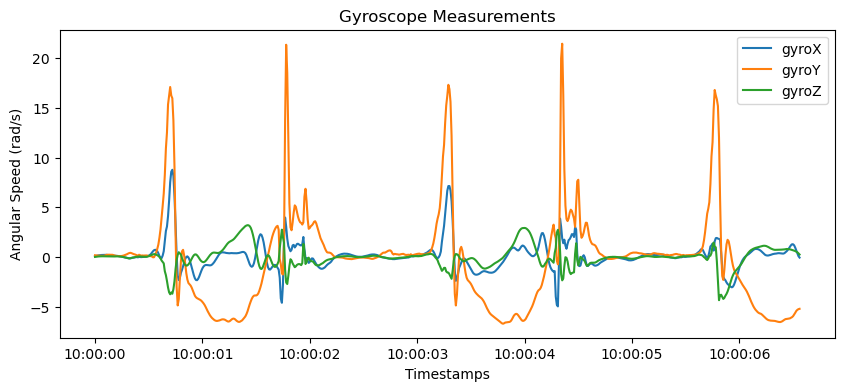

In [50]:
#8.b
# Plot gyroscope measurements
plt.figure(figsize=(10, 4))
plt.plot(timestamps, gyroX, label='gyroX')
plt.plot(timestamps, gyroY, label='gyroY')
plt.plot(timestamps, gyroZ, label='gyroZ')
plt.xlabel('Timestamps')
plt.ylabel('Angular Speed (rad/s)')
plt.legend()
plt.title('Gyroscope Measurements')
plt.show()

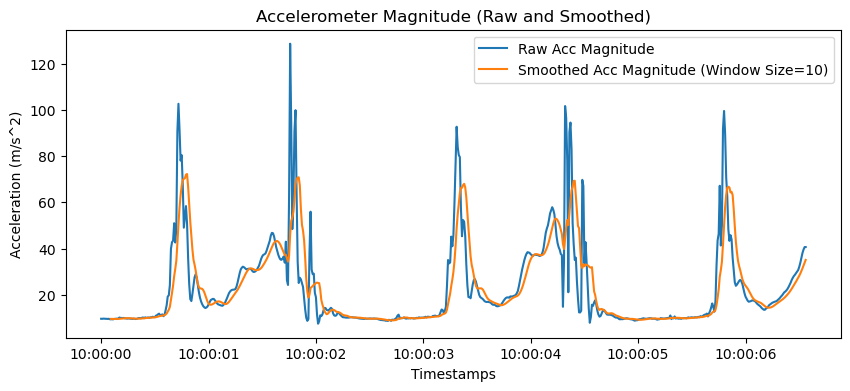

In [51]:
#8.c
# Plot both raw and smoothed accelerometer magnitudes
# Use np.arange to create an array with the correct length
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(acc_magnitude)) * time_interval + start_time, acc_magnitude, label='Raw Acc Magnitude')
plt.plot(timestamps[window_size-1:], acc_smooth, label=f'Smoothed Acc Magnitude (Window Size={window_size})')
plt.xlabel('Timestamps')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.title('Accelerometer Magnitude (Raw and Smoothed)')
plt.show()